In [53]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt


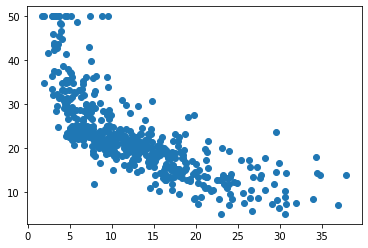

In [54]:
X, y = boston.data, boston.target
X12 = X[:, 12:13]

plt.scatter(X12, y)
plt.show()

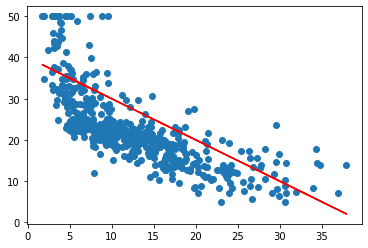

In [55]:
def modelolinear(X, a, b):
  y = a * X + b
  return y

ypred = modelolinear(X12, -1, 40)

plt.scatter(X12, y)
plt.plot(X12, ypred, 'r')
plt.show()

In [56]:
def mae(y, ypred):
  yDiff = ypred - y.reshape(-1, 1)
  yAbs = abs(yDiff)
  erroSum = sum(yAbs)

  return erroSum/len(yAbs)

def mse(y, ypred):
  yDiff = ypred - y.reshape(-1, 1)
  yDiffSquare = yDiff**2
  erroSum = sum(yDiffSquare)

  return erroSum/len(ypred)

In [57]:
print('mae:',mae(y, ypred))
print('mse:',mse(y, ypred))

mae: [6.96547431]
mse: [61.78580296]


In [58]:
def rmse(y, ypred):
  mse = mean_squared_error(y, ypred)
  return sqrt(mse)

In [59]:
print(rmse(y, ypred))

7.860394580708203


In [60]:
class regressao_linear():
  def __init__(self):
    self.a = 0
    self.b = 0

  def predict(self, X, y=None):
    ypred = self.a * X + self.b
    return ypred

  def fit(self, X, y):
    for _ in range(500):
      ypred = self.predict(X)
      erros = ypred - y.reshape(-1, 1)

      adjustB = sum(erros)/len(erros)
      #print(adjustB)

      self.b = self.b - adjustB*0.1

      adjustA = (sum(erros[i]*X[i]for i in range(X.shape[0])))/sum(X)
      self.a = self.a - adjustA*0.1
      #print(adjustA)

      ypred = self.predict(X)
      #print(mean_squared_error(y, ypred))

592.1469169960474


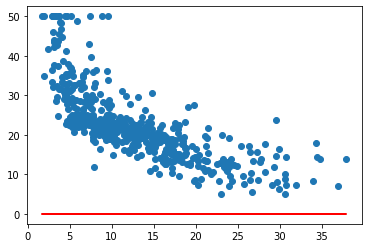

In [61]:
modelo = regressao_linear()

ypred = modelo.predict(X12)

plt.scatter(X12, y)
plt.plot(X12, ypred, 'r')
print(mean_squared_error(y, ypred))

38.48296725018394


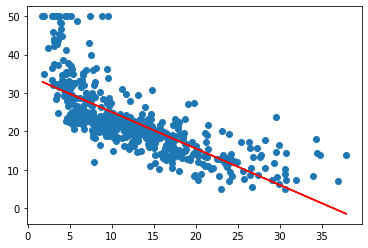

In [62]:
modelo = regressao_linear()
modelo.fit(X12, y)
ypred = modelo.predict(X12)

plt.scatter(X12, y)
plt.plot(X12, ypred, 'r')
print(mean_squared_error(y, ypred))

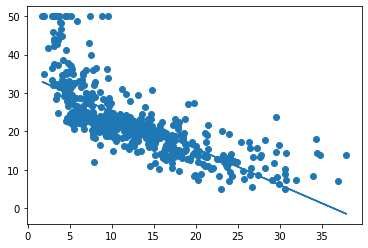

In [63]:
modelo = regressao_linear()
modelo.fit(X12, y)
ypred = modelo.predict(X12)

plt.scatter(X12, y)
plt.plot(X12, ypred)

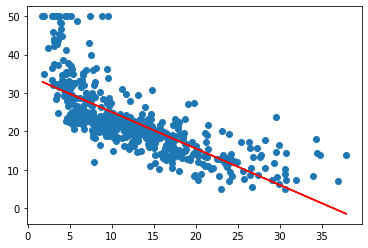

In [64]:
modelo = regressao_linear()
modelo.fit(X12, y)
ypred = modelo.predict(X12)

plt.scatter(X12, y)
plt.plot(X12, ypred, 'r')
# print(mean_squared_error(y, ypred))

**A PARTIR DAQUI É CÓDIGO DA AULA 3**

In [65]:
import numpy as np

class regressao_linear():
    def __init__(self):
        self.w = np.zeros((2, 1))
        self.wh = []

    @staticmethod
    def includeBias(X):
        bias = np.ones((X.shape[0], 1))
        Xb = np.concatenate((bias, X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = self.includeBias(X)
        #self.w = np.linalg.pinv(Xb).dot(y)
        for _ in range(20):
            ypred = self.predict(X)
            erros = ypred - y.reshape(-1, 1)
            ajuste = Xb.T.dot(erros)/np.sum(Xb.reshape(-1,1))
            self.w = self.w - ajuste*0.1
            mse = mean_squared_error(y,ypred)
            self.wh.append([self.w[0,0],self.w[1,0],mse])
            # custo = sum(erros**2)
            # print(custo)

    def predict(self, X, y=None):
        Xb = regressao_linear.includeBias(X)
        ypred = Xb.dot(self.w)
        return ypred

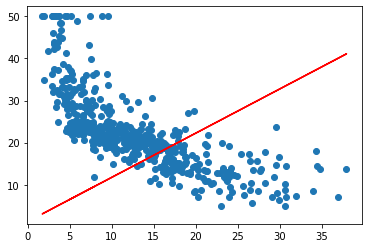

In [66]:
modelo = regressao_linear()
modelo.fit(X12, y)
ypred = modelo.predict(X12)

plt.scatter(X12, y)
plt.plot(X12, ypred,"r")

In [67]:
Xb = np.array(2)
erros = np.array(2)
Xb.T.dot(erros)*[0.5,0.2]

[0.5, 0.2, 0.5, 0.2, 0.5, 0.2, 0.5, 0.2]

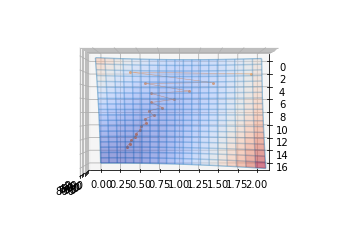

In [70]:
from sklearn.metrics import mean_squared_error
import numpy as np

class regressao_linear():
    def __init__(self):
        self.w = np.zeros((2,1))
        self.wh = []
        
    @staticmethod
    def addBias(X):
        bias = np.ones((X.shape[0],1))
        X_b = np.concatenate((bias,X),axis=1)
        return X_b

    def fit(self,X,y):
        X_b = self.addBias(X)
        for _ in range(20):
            ypred = self.predict(X)
            erro = ypred - y.reshape(-1,1)
            ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1, 1)
            self.w = self.w - 0.1*ajuste
            ypred = self.predict(X)
            mse = mean_squared_error(y, ypred)
            self.wh.append([self.w[0,0], self.w[1,0], mse])

    def predict(self, X):
        X_b = self.addBias(X)
        y = X_b.dot(self.w)
        return y

w0 = np.linspace(0, 16, 20)
w1 = np.linspace(0, 2, 20)

def z_function(W0, W1):
    modelo = regressao_linear()
    Erro = np.empty(W0.shape)
    for j in range(Erro.shape[0]):
        for k in range(Erro.shape[1]):
            modelo.w[0] = W0[j][k]
            modelo.w[1] = W1[j][k]
            ypred = modelo.predict(X12)
            mse = mean_squared_error(y, ypred)
            Erro[j][k] = mse
    return Erro

ax = plt.axes(projection="3d")
W0, W1 = np.meshgrid(w0, w1)
Erro = z_function(W0, W1)

ax.plot_wireframe(W0, W1, Erro, alpha=0.5)
ax.plot_surface(W0, W1, Erro, rstride=1, cstride=1, alpha=0.5,
                cmap='coolwarm', edgecolor='none')

modelo = regressao_linear()
modelo.fit(X12,y)
ypred = modelo.predict(X12)
wh = np.array(modelo.wh)
ax.plot(wh[:,0],wh[:,1],wh[:,2], marker='o', linewidth='0.5', markersize=2)
ax.view_init(azim=0, elev=90)

plt.show()

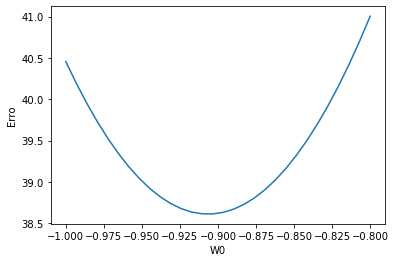

In [69]:
plt.ylabel("Erro")
plt.xlabel("W0")
i=8
plt.plot(W1[:,i],Erro[:,i])